In [1]:
# Import required libraries and packages

import numpy as np
from random import randint, uniform
from math import log
import matplotlib.pyplot as plt
from statistics import mean, median
import time

In [14]:
def pac(n_arms, epsilon, delta):

  ''' Function to implement the MEA algorithm for the bandit problem '''
 
  # Scaling of epsilon and delta  
  epsilon = epsilon/4
  delta = delta/2

  # Mean of each of the arms selected from a normal distrubtion of mean 0, variance 1  
  means = np.random.normal(0,1,n_arms)
  Q = [np.random.normal(means[i],1,1)[0] for i in range(n_arms)]
  
  # List to keep track of all the rewards
  rewards = []

  # Arm with maximum mean or reward (used to derive % Optimality)
  optimal_index = means.argmax()
  optimal_reward = max(means)
  optimality = []

  # Array ref has value 1 at the index of best arm and 0 at other indices (used to derive % Optimality)
  ref = np.zeros(n_arms)
  ref[optimal_index] = 1  

  # Initialize variables
  l = 1
  count = 0
  
  # Repeat until there is only one arm in the sample space S_l
  while len(Q) >= 1:                

    l_k = int((1/(epsilon/2)**2)*log(3/delta))
    
    # Sample each arm l_k number of times
    for i in range(2,l_k+1):
      for j in range(len(Q)):
        Q[j] = Q[j] + (np.random.normal(means[j],1,1)[0]-Q[j])/i
      rewards.append(mean(Q))
    
    # Compute the median of Q and remove the arms which have value less than that of the median
    means = [x for _,x in sorted(zip(Q,means))]
    ref = [x for _,x in sorted(zip(Q,ref))]
    Q.sort()
    med = median(Q)
    Q = [el for el in Q if el>med]
    means = means[-len(Q):]
    ref = ref[-len(Q):]
    
    # Calculation of %Optimal action
    # The algo is optimal throughout if it has the best arm in each of the set S_l 
    
    if sum(ref) == 1:   
      count += 1
    optimality.append(count*100/l)

    # Update rules for epsilon and delta
    epsilon = 0.75*epsilon
    delta = 0.5*delta
    
    l += 1

  return rewards, optimality

In [17]:
''' Averaging over different instances of the bandit problem '''

# An iterative averaging technique is used to save comp cost

def pac_run(n_arms,epsilon,delta,n_instance):
  rewards, optimality = pac(n_arms,epsilon,delta)
  for i in range(2,n_instance+1):
    rewards_, optimality_ = pac(n_arms,epsilon,delta)
    for j in range(len(rewards)):
      rewards[j] = rewards[j] + (rewards_[j] - rewards[j])/i
    for k in range(len(optimality)):
      optimality[k] = optimality[k] + (optimality_[k] - optimality[k])/i
      
  return rewards, optimality

In [23]:
# Run the MEA algo for different choices of epsilon, delta with n_arms = 10, n_instance = 2000

### EXPECTED RUN TIME is approx 16 mins ###

t1 = time.time()
reward1, optimality1 = pac_run(10,1.2,0.6,2000)
reward2, optimality2 = pac_run(10,0.6,0.6,2000)
reward3, optimality3 = pac_run(10,1.2,0.1,2000)
t2 = time.time()
print("Execution time: "+str(int(t2-t1))+" seconds")

Execution time: 999 seconds


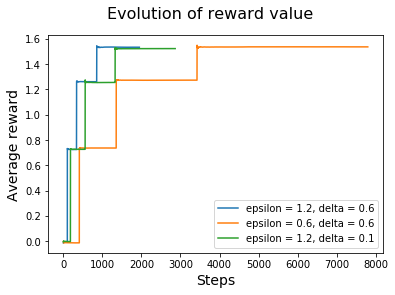

In [24]:
# Plot the evolution of reward through the time steps

fig = plt.figure()
fig.suptitle('Evolution of reward value', fontsize = 16)
plt.plot(reward1)
plt.plot(reward2)
plt.plot(reward3)
plt.xlabel('Steps', fontsize = 14)
plt.ylabel('Average reward', fontsize = 14)
plt.legend(['epsilon = 1.2, delta = 0.6', 'epsilon = 0.6, delta = 0.6', 'epsilon = 1.2, delta = 0.1'])

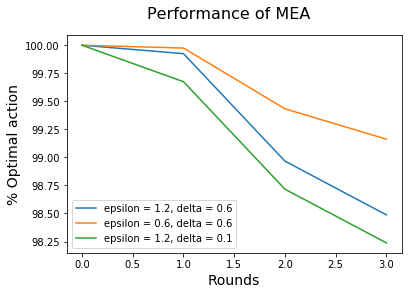

In [25]:
# Plot % Optimal action through number of rounds

fig = plt.figure()
fig.suptitle('Performance of MEA', fontsize = 16)
plt.plot(optimality1)
plt.plot(optimality2)
plt.plot(optimality3)
plt.xlabel('Rounds', fontsize = 14)
plt.ylabel('% Optimal action', fontsize = 14)
plt.legend(['epsilon = 1.2, delta = 0.6', 'epsilon = 0.6, delta = 0.6', 'epsilon = 1.2, delta = 0.1'])

In [32]:
### Redefine epsilon-greedy, softmax and ucb with 2000 time steps for comparing with MEA....###



### EPSILON-GREEDY....###



def epsilon_greedy(n_arms, epsilon):
  
  ''' Function to implement the epsilon-greedy approach for the bandit problem '''

  # Mean of each of the arms selected from a normal distrubtion of mean 0, variance 1
  means = np.random.normal(0,1,n_arms)  

  # Arm with maximum mean or reward (used to derive % Optimality)
  max_index = means.argmax()  

  # Initialize parameters 
  Q = np.zeros(n_arms)  
  N = np.ones(n_arms)                   

  ### Randomly pick an arm ###
  arm_index = randint(0, n_arms-1)            
  Q[arm_index] = np.random.normal(means[arm_index], 1, 1)[0]

  # List to keep track of all the rewards
  rewards = np.array([])        

  # Initialize the variables used to derive % Optimality
  count = 0  
  optimality = np.array([])

  ##### ITERATION THROUGH TIME STEPS #####

  for t in range(1,2000):

    # Randomly select an arm with probability epsilon 
    rand = uniform(0,1)
    if rand < epsilon:
      arm_index = randint(0,n_arms-1)
    else:
      # Select the arm of maximum mean (reward) with probablity epsilon
      arm_index = Q.argmax()
    
    # Update the reward and append it to Rewards for plotting the evolution
    reward = np.random.normal(means[arm_index],1,1)[0]
    rewards = np.append(rewards, reward)

    # Update % Optimality and append it to Optimality for plotting the evolution
    if arm_index == max_index:
      count += 1
    percent_optimality = count/(t)*100
    optimality = np.append(optimality, percent_optimality)

    # Update the parameters N,Q
    N[arm_index] += 1
    Q[arm_index] = Q[arm_index] + (reward - Q[arm_index])/N[arm_index]
   
  return rewards, optimality

''' Averaging over different instances of the bandit problem '''

# An iterative averaging technique is used to save comp cost

def epsilon_greedy_run(n_arms,epsilon,n_instance):
  rewards, optimality = epsilon_greedy(n_arms,epsilon)
  for i in range(2,n_instance+1):
    rewards_, optimality_ = epsilon_greedy(n_arms,epsilon)
    for j in range(len(rewards)):
      rewards[j] = rewards[j] + (rewards_[j] - rewards[j])/i
      optimality[j] = optimality[j] + (optimality_[j] - optimality[j])/i
      
  return rewards, optimality



### SOFTMAX....###

def gibbs(x,beta):

    """ Return the gibbs distribtuion for each sets of scores in x """
    return np.exp(x/beta) / np.sum(np.exp(x/beta), axis=0)

def softmax(n_arms, beta):

  """ Function to implement the softmax action selection method for the bandit problem """

  # Mean of each of the arms selected from a normal distrubtion of mean 0, variance 1
  means = np.random.normal(0,1,n_arms)

  # Arm with maximum mean or reward (used to derive % Optimality)
  max_index = means.argmax()  

  # Initialize parameters 
  Q = np.zeros(n_arms)
  N = np.ones(n_arms)
  H = np.zeros(n_arms)

  ### Randomly pick an arm ###
  arm_index = randint(0, n_arms-1)            
  Q[arm_index] = np.random.normal(means[arm_index], 1, 1)[0]

  # List to keep track of all the rewards
  rewards = np.array([])
  
  # Obtain probability vector pi from the gibbs ditribution
  pi = gibbs(Q, beta)

  # Initialize the variables used to derive % Optimality
  count = 0  
  optimality = np.array([])

  for t in range(1,2000):

    # Select an arm by sampling from the softmax distribution
    arm_index = np.random.choice(len(H),1, p = pi)[0]
    reward = np.random.normal(means[arm_index],1,1)[0]

    # Update the reward to the array rewards for plotting
    rewards = np.append(rewards, reward)

    # Update rules for N, Q
    N[arm_index] += 1
    Q[arm_index] = Q[arm_index] + (reward - Q[arm_index])/N[arm_index]

    # Update the probability vector 
    pi = gibbs(Q, beta)

    # Update %Optimality to the array optimality for plotting
    if arm_index == max_index:
      count += 1
    percent_optimality = count/(t)*100
    optimality = np.append(optimality, percent_optimality)

  return rewards, optimality

''' Averaging over different instances of the bandit problem '''

# An iterative averaging technique is used to save comp cost

def softmax_run(n_arms,beta,n_instance):
  rewards, optimality = softmax(n_arms,beta)
  for i in range(2,n_instance+1):
    rewards_, optimality_ = softmax(n_arms,beta)
    for j in range(len(rewards)):
      rewards[j] = rewards[j] + (rewards_[j] - rewards[j])/i
      optimality[j] = optimality[j] + (optimality_[j] - optimality[j])/i
      
  return rewards, optimality



###  UCB1 ......###

def ucb(n_arms,c):
  
  ''' Function to implement the UCB1 algorithm for the bandit problem... '''

  # Mean of each of the arms selected from a normal distrubtion of mean 0, variance 1
  means = np.random.normal(0,1,n_arms)  

  # Arm with maximum mean or reward (used to derive % Optimality)
  max_index = means.argmax()  

  # Initialize parameters 
  Q = np.zeros(n_arms)  
  N = np.ones(n_arms)                   

  ### Randomly pick an arm ###
  arm_index = randint(0, n_arms-1)            
  Q[arm_index] = np.random.normal(means[arm_index], 1, 1)[0]

  # List to keep track of all the rewards
  rewards = np.array([])        

  # Initialize the variables used to derive % Optimality
  count = 0  
  optimality = np.array([])

  ##### ITERATION THROUGH TIME STEPS #####

  for t in range(1,2000):


    arm_index = (Q+c*np.sqrt(np.log(t)/N)).argmax()
    
    # Update the reward and append it to Rewards for plotting the evolution
    reward = np.random.normal(means[arm_index],1,1)[0]
    rewards = np.append(rewards, reward)

    # Update % Optimality and append it to Optimality for plotting the evolution
    if arm_index == max_index:
      count += 1
    percent_optimality = count/(t)*100
    optimality = np.append(optimality, percent_optimality)

    # Update the parameters N,Q
    N[arm_index] += 1
    Q[arm_index] = Q[arm_index] + (reward - Q[arm_index])/N[arm_index]
   
  return rewards, optimality

''' Averaging over different instances of the bandit problem... '''

# An iterative averaging technique is used to save comp cost....

def ucb_run(n_arms,c,n_instance):
  rewards, optimality = ucb(n_arms,c)
  for i in range(2,n_instance+1):
    rewards_, optimality_ = ucb(n_arms,c)
    for j in range(len(rewards)):
      rewards[j] = rewards[j] + (rewards_[j] - rewards[j])/i
      optimality[j] = optimality[j] + (optimality_[j] - optimality[j])/i
      
  return rewards, optimality

In [33]:
# Run epsilon-greedy, softmax and ucb1 to compare with MEA

### RUN TIME is about 7 mins###

t1 = time.time()
reward_egreedy, optimality_egreedy = epsilon_greedy_run(10,0.1,2000)
reward_softmax, optimality_softmax = softmax_run(10,0.1,2000)
reward_ucb, optimality_ucb  = ucb_run(10,2,2000)
t2 = time.time()
print("Execution time: "+str(int(t2-t1))+" seconds")

Execution time: 441 seconds


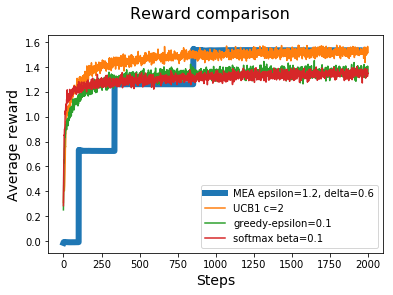

In [35]:
# Reward comparison UCB1 vs epsilon-greedy vs softmax

fig = plt.figure()
fig.suptitle('Reward comparison', fontsize = 16)
plt.plot(reward1,linewidth = 6) 
plt.plot(reward_ucb)
plt.plot(reward_egreedy)
plt.plot(reward_softmax)
plt.xlabel('Steps', fontsize = 14)
plt.ylabel('Average reward', fontsize = 14)
plt.legend(['MEA epsilon=1.2, delta=0.6','UCB1 c=2','greedy-epsilon=0.1','softmax beta=0.1'])